In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [2]:
pd.__version__

u'0.20.1'

In [4]:
data = pd.read_excel("test.xlsx")
data

,SYMBOL,P/E,ROE,CF/NI,D/A,EPS,REV
0,AAPL,19.00,0.369,1.3,0.308,9.19,0.063
1,MSFT,30.10,0.289,1.9,0.358,2.68,0.054
2,FB,35.10,0.243,1.6,0.000,5.16,0.542
3,AMZ,292.94,0.091,6.9,0.245,3.95,0.271


In [5]:
data.index = data.iloc[:,0]

In [6]:
data = data.iloc[:,1:]

In [7]:
data

,P/E,ROE,CF/NI,D/A,EPS,REV
SYMBOL,,,,,,
AAPL,19.00,0.369,1.3,0.308,9.19,0.063
MSFT,30.10,0.289,1.9,0.358,2.68,0.054
FB,35.10,0.243,1.6,0.000,5.16,0.542
AMZ,292.94,0.091,6.9,0.245,3.95,0.271


In [11]:
matrx_data = data.as_matrix()

In [18]:
dat_mean = data.apply(np.mean, 0)
np.array(dat_mean)

array([ 94.285  ,   0.248  ,   2.925  ,   0.22775,   5.245  ,   0.2325 ])

In [20]:
demean_data = data - np.array(dat_mean)
demean_data_matrix = demean_data.as_matrix()

In [21]:
pca = PCA(n_components=2)
pca.fit(demean_data_matrix)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [34]:
# Coefficients
pd.DataFrame(pca.components_,index = ['PC1','PC2'],columns = data.columns)

,P/E,ROE,CF/NI,D/A,EPS,REV
PC1,0.999773,-0.000808,0.020017,0.000047,-0.007292,0.000257
PC2,0.008354,0.012567,-0.052928,-0.000193,0.998445,-0.008813


In [23]:
pca.explained_variance_ratio_

array([  9.99595476e-01,   3.99352118e-04])

In [27]:
score = np.matmul(pca.components_ , demean_data_matrix.T)

In [28]:
score_df = pd.DataFrame(score,index = ['PC1','PC2'],columns = data.index)

In [29]:
score_df

SYMBOL,AAPL,MSFT,FB,AMZ
PC1,-75.329319,-64.172296,-59.197376,198.698991
PC2,3.398914,-3.040924,-0.511939,0.153948


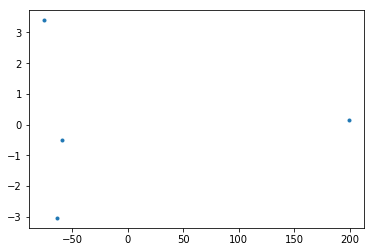

In [32]:
plt.plot(score_df.iloc[0,:],score_df.iloc[1,:],'.')
plt.show()